# Declaration of Originality

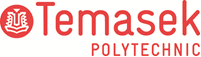

**TEMASEK POLYTECHNIC**
<br>**SCHOOL OF INFORMATICS & IT**
<br>**DIPLOMA IN INFORMATION TECHNOLOGY**
<br>**MACHINE LEARNING FOR DEVELOPERS (CAI2C08)**
<br>**AY2025/2026 OCTOBER SEMESTER**

**PROJECT PROGRAM CODES**
* Student Name (Matric Number)  : Sharmyn Ho (2400847F)
* Tutorial Group                : P03
* Tutor						    : Mr Ruchir Srivastava
* Submission Date               : 11/02/2026


**Declaration of Originality**
* I am the originator of this work and I have appropriately acknowledged all other original sources used as my references for this work.
* I understand that Plagiarism is the act of taking and using the whole or any part of another person’s work, including work generated by AI, and presenting it as my own.
* I understand that Plagiarism is an academic offence and if I am found to have committed or abetted the offence of plagiarism in relation to this submitted work, disciplinary action will be enforced.

# Libraries

In [1]:
## Import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px

# 1. Business Understanding
### **Goal:**
To develop a supervised machine learning classification model that predicts whether a patient is at risk of stroke based on dmeographic and health-related factors.

---

### **Problem formulation:**
This project is formulated as a binary classification problem, where the model predicts whether a patient has experienced or is at risk of experiencing a stroke (stroke = 1) or not (stroke = 0). The prediction is based on patient attributes such as age, gender, medical conditions (e.g., hypertension and heart disease), lifestyle factors, and clinical measurements.
The intended application of this model is to support healthcare professionals and decision-makers by providing an additional data-driven tool for identifying high-risk patients, enabling earlier intervention and more targeted preventive strategies.

---

### **Background and motivation:**
Stroke is a major global health concern and one of the leading causes of death and long-term disability worldwide. According to the World Health Organisation (WHO), the lifetime risk of stroke has increased significantly over the past two decades, with an estimated 1 in 4 adults expected to experience a stroke in their lifetime.
Early identification of individuals at higher risk of stroke is critical for preventive healthcare. Many stroke risk factors, such as hypertension, high blood glucose levels, smoking habits, and body mass index, are measurable and potentially modifiable. This makes stroke risk assessment a suitable and impactful problem for supervised machine learning, where patterns in patient data can be used to support early risk screening and decision-making.

# 2. Data Understanding

## 2.1 Load dataset

In [2]:
## The dataset is loaded from a CSV file into a pandas DataFrame for exploration and preprocessing.
FILE_PATH = "healthcare-dataset-stroke-data.csv"
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


## 2.2 Summary Statistics

### **2.2.1 Understand variable types**

In [3]:
## Understand the type of variable for each column
#Display column names and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


Based on the dataset structure and data types, the variables can be grouped into numerical, categorical, and binary features. Understanding the variable types is important because numerical, categorical, and binary features require different preprocessing techniques, which directly affects model performance and interpretation.

**Numerical variables** include:
- `age`
- `avg_glucose_level`
- `bmi`

These variables represent continuous patient measurements and may contain a wide range of values and potential outliers.

---

**Categorical variables** include:
- `gender`
- `ever_married`
- `work_type`
- `Residence_type`
- `smoking_status`

These variables describe demographic and lifestyle characteristics and are stored as object data types.

---

**Binary variables** include:
- `hypertension`
- `heart_disease`
- `stroke` (target variable)

These variables take values of 0 or 1 to indicate the absence or presence of a medical condition and binary variables can be used directly by classification models without additional encoding.

---

The `id` column serves as a unique identifier for each patient and does not contain predictive information. It is retained at this stage for data understanding but I will remove it later on during data preparation.

### **2.2.2 Check for missing data**

In [4]:
## Check for missing data in each column
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

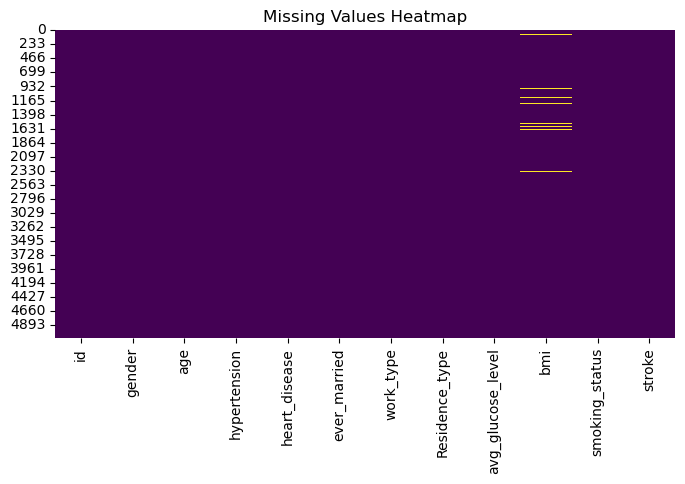

In [5]:
# Visualise missing values
plt.figure(figsize=(8, 4))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

The above inspection of missing values shows that the dataset is largely complete, with the exception of the `bmi` attribute, which contains 201 missing entries. All other variables, including the target variable `stroke`, have no missing values.

The missing values in `bmi` are visualised in the heatmap as shown above, where gaps appear only along the BMI column, confirming that missingness is isolated to this feature.

In a healthcare context, missing clinical measurements such as BMI may not be randomly distributed and could be associated with specific patient groups or conditions. Removing rows with missing BMI values may therefore reduce the dataset size and potentially discard important stroke-positive cases, further worsening the existing class imbalance on my target variable `stroke`.

As a result, I have noted the presence of missing BMI values at this stage and I handle it carefully later on during the data preparation phase to minimise information loss and avoid introducing bias into the model.

### **2.2.3 Summary statistics (numerical features)**

In [6]:
# Summary statistics for numerical variables
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


The summary statistics above provide an overview of the numerical features in the dataset, including age, average glucose level, and body mass index (BMI).

The `age` variable spans a wide range, from infancy to older adulthood, with a mean age of approximately 43 years. This broad distribution suggests that stroke risk may vary significantly across different age groups, highlighting age as a potentially important predictive feature.

The `avg_glucose_level` variable shows substantial variability, with values ranging from approximately 55 to over 270. The large spread and high maximum value indicate the presence of possible outliers and suggest a right-skewed distribution, which may influence certain models that are sensitive to extreme values.

Similarly, the `bmi` variable exhibits a wide range, from 10.3 to 97.6, with noticeable variability across patients. Such dispersion suggests that BMI may contain outliers and non-uniform distributions that require further visual examination.

These observations indicate that visual exploration of numerical feature distributions is necessary to better understand their shape, detect outliers, and assess their relationship with the target variable, which I will later address in my subsequent exploratory data analysis section below.

### **2.2.4 Data distribution**

In [7]:
# Distribution of target variable
df['stroke'].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

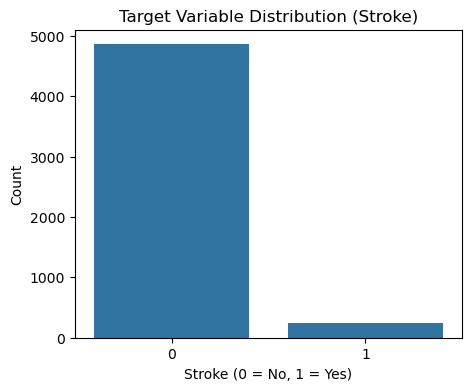

In [8]:
## Data distribution visualisation
plt.figure(figsize=(5, 4))
sns.countplot(x='stroke', data=df)
plt.title("Target Variable Distribution (Stroke)")
plt.xlabel("Stroke (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

The distribution of the target variable `stroke` shows a strong class imbalance, with out of 5,110 records, only 249 patients experienced a stroke (`stroke = 1`), while 4,861 patients did not (`stroke = 0`), this indicates that stroke cases account for less than 5% of the dataset.

The count plot above further illustrates this imbalance, with non-stroke cases significantly outnumbering stroke cases, such imbalance is common in healthcare datasets, where adverse medical events occur less frequently than normal outcomes.

This class imbalance has important implications for my model evaluation later on, as metrics such as accuracy may be misleading, as a model can achieve high accuracy by predicting the majority class while failing to identify stroke cases. Therefore, I will need to consider task-appropriate evaluation metrics such as F1-score and recall in later stages to better assess my model’s ability to identify high-risk stroke patients.

### **2.2.5 Categorical values overview**

In [9]:
# Check unique values for categorical columns
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    print(f"\n{col} value counts:")
    print(df[col].value_counts())


gender value counts:
gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

ever_married value counts:
ever_married
Yes    3353
No     1757
Name: count, dtype: int64

work_type value counts:
work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

Residence_type value counts:
Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64

smoking_status value counts:
smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64


I examined the categorical variables shown above and notice that most categories are unevenly distributed. The above show that a small number of categories account for the majority of the records, while some categories appear only in a very small number of cases.

For example, the `gender` variable contains a rare category (`Other`) with only a single occurrence. Similarly, the `work_type` variable includes the category `Never_worked`, which appears in a very small number of records compared to other work types. These rare categories may have limited predictive power on their own and could introduce noise if handled improperly.

In addition, the `smoking_status` variable includes an `Unknown` category, which represents unavailable information and may account for a noticeable proportion of the dataset and therefore it cannot be ignored without careful consideration.

If i blindly remove any rows containing rare categories or unknown values it could disproportionately reduce the dataset size and potentially eliminate stroke-positive cases, further worsening the existing class imbalance. As a result, I have noted these categorical distributions at this stage and I will need to be careful when handling this during data preparation through one-hot encoding or grouping strategies.

## 2.3 Data Visualization

### 2.3.1 Understanding distribution of data

### 2.3.1.1 Understanding distribution of target

In [10]:
## Understanding distribution of target


### 2.3.1.2 Understanding distribution of features

In [11]:
## Understanding distribution of features


### 2.3.2 Understanding relationship between variables

In [12]:
## Understanding relationship between variables


# 3. Data Preparation

## 3.1 Data Cleaning

In [13]:
## Clean data

## 3.2 Train-Test Split

In [14]:
## Split data into train set and test set


# 4. Modelling

### 4.2 Train Model

In [15]:
## Initialise and train model


# 5. Model Evaluation

In [16]:
## Evaluate model


In [17]:
## New data

## Predict


## Iterative model development


In [18]:
## Further feature engineering / feature selection